#
---
# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
import torch
%load_ext Cython
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, fbeta_score, precision_score, recall_score, average_precision_score

#
---
# Importing Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

data = np.load('/content/drive/MyDrive/Data/Cardio/data.npz')
trainx = data['arr1']
trainy = data['arr2']
testx = data['arr3']
testy = data['arr4']

# df_log = pd.read_csv('df_log.csv')
# labels = df_log['cardio'].to_numpy()
# df_log_processed = df_log.drop(columns=['cardio'])
# data = df_log_processed.to_numpy()
# trainx, testx, trainy, testy = train_test_split(data, labels, test_size=0.15, random_state=42)

# Standardization
# scaler = StandardScaler()
# # scaler = RobustScaler()
# # scaler = MinMaxScaler()
# # Fit the scaler on the training data and transform both the training and test data
# trainx = scaler.fit_transform(trainx)
# testx = scaler.transform(testx)

In [4]:
pca = PCA(n_components = 0.95)
pca.fit(trainx)
trainx = pca.transform(trainx)
testx = pca.transform(testx)
# number of PCs
nPC = trainx.shape[1]
# PCs
PC = pca.components_
print('nPC = ', nPC)

nPC =  26


In [ ]:
df_log

,height,cholesterol,gluc,smoke,active,cardio,age_years,bmi,bp_category_Elevated,bp_category_Hypertension Stage 1,bp_category_Hypertension Stage 2,bp_category_Normal,pulse_pressure
0,5.123964,1,1,0,1,0,3.931826,3.089547,0,1,0,0,3.433987
1,5.049856,3,1,0,1,1,4.025352,3.553280,0,0,1,0,3.931826
2,5.105945,3,1,0,0,1,3.951244,3.157333,0,1,0,0,4.110874
3,5.129899,1,1,0,1,1,3.891820,3.357262,0,0,1,0,3.931826
4,5.049856,1,1,0,0,0,3.871201,3.135980,0,0,0,1,3.713572
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65918,5.105945,1,1,0,1,1,4.060443,3.380476,0,1,0,0,4.262680
65919,5.123964,1,1,1,1,0,3.970292,3.293146,0,1,0,0,3.713572
65920,5.209486,3,1,0,0,1,3.970292,3.445328,0,0,1,0,4.510860
65921,5.093750,1,2,0,0,1,4.127134,3.299506,0,1,0,0,4.025352


#
---
# Machine Learning Models

#### ◉ Logistic Regression (Python)

Training Accuracy: 0.7285008119635241
Accuracy: 0.7341490545050056
AUC: 0.7331990981055291
F1-score: 0.7108764984053667
F2-score: 0.681080625447802
Precision per class: [0.70990483 0.76678529]
Average Precision: 0.6744939106272363
Weighted Average Recall: 0.7341490545050056
Classification Report:
               precision    recall  f1-score   support

           0    0.70990   0.80383   0.75395      5011
           1    0.76679   0.66257   0.71088      4878

    accuracy                        0.73415      9889
   macro avg    0.73835   0.73320   0.73242      9889
weighted avg    0.73796   0.73415   0.73271      9889



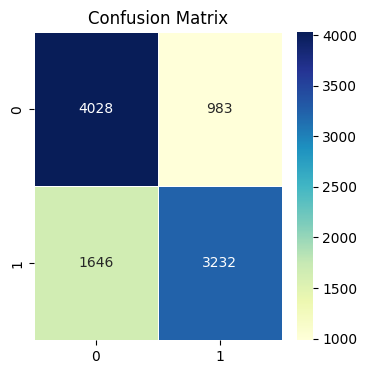

True Positive Cases: 3232
True Negative Cases: 4028
False Positive Cases: 983
False Negative Cases: 1646


In [5]:
# Define the Logistic Regression model
model = LogisticRegression(C=0.05, penalty='l2')

# Fit the model to find the best parameters
model.fit(trainx, trainy)

# Make predictions on the training set
trainy_pred = model.predict(trainx)

# Evaluate the model on the training set
accuracy_train = accuracy_score(trainy, trainy_pred)
print("Training Accuracy:", accuracy_train)

# Make predictions on the test set
testy_pred = model.predict(testx)

# Evaluate the model on the test set
accuracy = accuracy_score(testy, testy_pred)
report = classification_report(testy, testy_pred, digits=5)
auc = roc_auc_score(testy, testy_pred)
f2 = fbeta_score(testy, testy_pred, beta=2)
precision_per_class = precision_score(testy, testy_pred, average=None)
f1 = fbeta_score(testy, testy_pred, beta=1)
average_precision = average_precision_score(testy, testy_pred)
weighted_recall = recall_score(testy, testy_pred, average='weighted')

# Additional Metrics
print("Accuracy:", accuracy)
print("AUC:", auc)
print("F1-score:", f1)
print("F2-score:", f2)
print("Precision per class:", precision_per_class)
print("Average Precision:", average_precision)
print("Weighted Average Recall:", weighted_recall)
print("Classification Report:\n", report)

# Confusion Matrix Visualization
plt.rcParams['figure.figsize'] = (4, 4)
sns.heatmap(confusion_matrix(testy, testy_pred), annot=True, fmt='d', linewidths=.5, cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.show()

# True Positive, True Negative, False Positive, False Negative
tp = confusion_matrix(testy, testy_pred)[1][1]
tn = confusion_matrix(testy, testy_pred)[0][0]
fp = confusion_matrix(testy, testy_pred)[0][1]
fn = confusion_matrix(testy, testy_pred)[1][0]

print('True Positive Cases: {}'.format(tp))
print('True Negative Cases: {}'.format(tn))
print('False Positive Cases: {}'.format(fp))
print('False Negative Cases: {}'.format(fn))

---
#### ◉ k-Nearst Neighbors (k-NN) (Python)

Training Accuracy: 0.736138622695719
Accuracy: 0.7325310951562342
AUC: 0.731852900249218
F1-score: 0.7153771656085225
F2-score: 0.6946127805408115
Precision per class: [0.71611253 0.75288788]
Average Precision: 0.6701822928314811
Weighted Average Recall: 0.7325310951562342
Classification Report:
               precision    recall  f1-score   support

           0    0.71611   0.78228   0.74773      5011
           1    0.75289   0.68143   0.71538      4878

    accuracy                        0.73253      9889
   macro avg    0.73450   0.73185   0.73156      9889
weighted avg    0.73425   0.73253   0.73177      9889



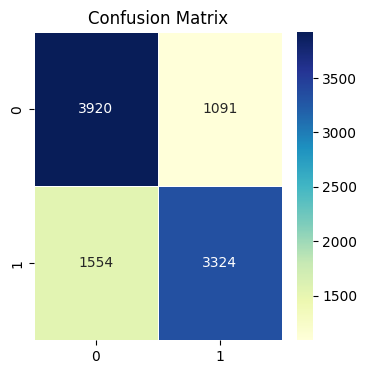

True Positive Cases: 3324
True Negative Cases: 3920
False Positive Cases: 1091
False Negative Cases: 1554


In [ ]:
# Define the Logistic Regression model
model = KNeighborsClassifier(n_neighbors=35, p=2, weights='uniform')

# Fit the model to find the best parameters
model.fit(trainx, trainy)

# Make predictions on the training set
trainy_pred = model.predict(trainx)

# Evaluate the model on the training set
accuracy_train = accuracy_score(trainy, trainy_pred)
print("Training Accuracy:", accuracy_train)

# Make predictions on the test set
testy_pred = model.predict(testx)

# Evaluate the model on the test set
accuracy = accuracy_score(testy, testy_pred)
report = classification_report(testy, testy_pred, digits=5)
auc = roc_auc_score(testy, testy_pred)
f2 = fbeta_score(testy, testy_pred, beta=2)
precision_per_class = precision_score(testy, testy_pred, average=None)
f1 = fbeta_score(testy, testy_pred, beta=1)
average_precision = average_precision_score(testy, testy_pred)
weighted_recall = recall_score(testy, testy_pred, average='weighted')

# Additional Metrics
print("Accuracy:", accuracy)
print("AUC:", auc)
print("F1-score:", f1)
print("F2-score:", f2)
print("Precision per class:", precision_per_class)
print("Average Precision:", average_precision)
print("Weighted Average Recall:", weighted_recall)
print("Classification Report:\n", report)

# Confusion Matrix Visualization
plt.rcParams['figure.figsize'] = (4, 4)
sns.heatmap(confusion_matrix(testy, testy_pred), annot=True, fmt='d', linewidths=.5, cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.show()

# True Positive, True Negative, False Positive, False Negative
tp = confusion_matrix(testy, testy_pred)[1][1]
tn = confusion_matrix(testy, testy_pred)[0][0]
fp = confusion_matrix(testy, testy_pred)[0][1]
fn = confusion_matrix(testy, testy_pred)[1][0]

print('True Positive Cases: {}'.format(tp))
print('True Negative Cases: {}'.format(tn))
print('False Positive Cases: {}'.format(fp))
print('False Negative Cases: {}'.format(fn))

---
#### ◉ Random Forest (Python)

Training Accuracy: 0.759569570105466
Accuracy: 0.7368793609060572
AUC: 0.7362305183618589
F1-score: 0.7206356023190895
F2-score: 0.7006848171037247
Precision per class: [0.72088758 0.75653742]
Average Precision: 0.6743962028985143
Weighted Average Recall: 0.7368793609060572
Classification Report:
               precision    recall  f1-score   support

           0    0.72089   0.78447   0.75134      5011
           1    0.75654   0.68799   0.72064      4878

    accuracy                        0.73688      9889
   macro avg    0.73871   0.73623   0.73599      9889
weighted avg    0.73847   0.73688   0.73619      9889



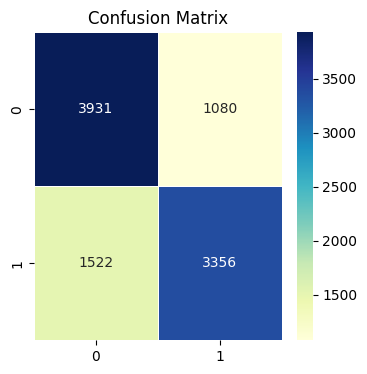

True Positive Cases: 3356
True Negative Cases: 3931
False Positive Cases: 1080
False Negative Cases: 1522


In [ ]:
# Define the Logistic Regression model
model = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300, random_state=42)

# Fit the model to find the best parameters
model.fit(trainx, trainy)

# Make predictions on the training set
trainy_pred = model.predict(trainx)

# Evaluate the model on the training set
accuracy_train = accuracy_score(trainy, trainy_pred)
print("Training Accuracy:", accuracy_train)

# Make predictions on the test set
testy_pred = model.predict(testx)

# Evaluate the model on the test set
accuracy = accuracy_score(testy, testy_pred)
report = classification_report(testy, testy_pred, digits=5)
auc = roc_auc_score(testy, testy_pred)
f2 = fbeta_score(testy, testy_pred, beta=2)
precision_per_class = precision_score(testy, testy_pred, average=None)
f1 = fbeta_score(testy, testy_pred, beta=1)
average_precision = average_precision_score(testy, testy_pred)
weighted_recall = recall_score(testy, testy_pred, average='weighted')

# Additional Metrics
print("Accuracy:", accuracy)
print("AUC:", auc)
print("F1-score:", f1)
print("F2-score:", f2)
print("Precision per class:", precision_per_class)
print("Average Precision:", average_precision)
print("Weighted Average Recall:", weighted_recall)
print("Classification Report:\n", report)

# Confusion Matrix Visualization
plt.rcParams['figure.figsize'] = (4, 4)
sns.heatmap(confusion_matrix(testy, testy_pred), annot=True, fmt='d', linewidths=.5, cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.show()

# True Positive, True Negative, False Positive, False Negative
tp = confusion_matrix(testy, testy_pred)[1][1]
tn = confusion_matrix(testy, testy_pred)[0][0]
fp = confusion_matrix(testy, testy_pred)[0][1]
fn = confusion_matrix(testy, testy_pred)[1][0]

print('True Positive Cases: {}'.format(tp))
print('True Negative Cases: {}'.format(tn))
print('False Positive Cases: {}'.format(fp))
print('False Negative Cases: {}'.format(fn))

---
#### ◉ XGBoost (Python)

Training Accuracy: 0.7390295697485589
Accuracy: 0.7334411972899181
AUC: 0.7328026148950375
F1-score: 0.7172280626475005
F2-score: 0.6977375187844381
Precision per class: [0.71808999 0.75225023]
Average Precision: 0.6707564933192316
Weighted Average Recall: 0.7334411972899181
Classification Report:
               precision    recall  f1-score   support

           0    0.71809   0.78028   0.74790      5011
           1    0.75225   0.68532   0.71723      4878

    accuracy                        0.73344      9889
   macro avg    0.73517   0.73280   0.73256      9889
weighted avg    0.73494   0.73344   0.73277      9889



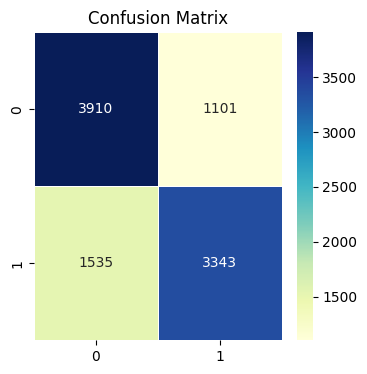

True Positive Cases: 3343
True Negative Cases: 3910
False Positive Cases: 1101
False Negative Cases: 1535


In [ ]:
# Define the Logistic Regression model
model = XGBClassifier(colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, reg_alpha=10, reg_lambda=1, subsample=0.8, random_state=42)

# Fit the model to find the best parameters
model.fit(trainx, trainy)

# Make predictions on the training set
trainy_pred = model.predict(trainx)

# Evaluate the model on the training set
accuracy_train = accuracy_score(trainy, trainy_pred)
print("Training Accuracy:", accuracy_train)

# Make predictions on the test set
testy_pred = model.predict(testx)

# Evaluate the model on the test set
accuracy = accuracy_score(testy, testy_pred)
report = classification_report(testy, testy_pred, digits=5)
auc = roc_auc_score(testy, testy_pred)
f2 = fbeta_score(testy, testy_pred, beta=2)
precision_per_class = precision_score(testy, testy_pred, average=None)
f1 = fbeta_score(testy, testy_pred, beta=1)
average_precision = average_precision_score(testy, testy_pred)
weighted_recall = recall_score(testy, testy_pred, average='weighted')

# Additional Metrics
print("Accuracy:", accuracy)
print("AUC:", auc)
print("F1-score:", f1)
print("F2-score:", f2)
print("Precision per class:", precision_per_class)
print("Average Precision:", average_precision)
print("Weighted Average Recall:", weighted_recall)
print("Classification Report:\n", report)

# Confusion Matrix Visualization
plt.rcParams['figure.figsize'] = (4, 4)
sns.heatmap(confusion_matrix(testy, testy_pred), annot=True, fmt='d', linewidths=.5, cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.show()

# True Positive, True Negative, False Positive, False Negative
tp = confusion_matrix(testy, testy_pred)[1][1]
tn = confusion_matrix(testy, testy_pred)[0][0]
fp = confusion_matrix(testy, testy_pred)[0][1]
fn = confusion_matrix(testy, testy_pred)[1][0]

print('True Positive Cases: {}'.format(tp))
print('True Negative Cases: {}'.format(tn))
print('False Positive Cases: {}'.format(fp))
print('False Negative Cases: {}'.format(fn))

---
#### ◉ LGBM (Python)

[LightGBM] [Info] Number of positive: 27668, number of negative: 28369
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020615 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6630
[LightGBM] [Info] Number of data points in the train set: 56037, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493745 -> initscore=-0.025020
[LightGBM] [Info] Start training from score -0.025020
Training Accuracy: 0.7495940182379499
Accuracy: 0.7366771159874608
AUC: 0.73607720661122
F1-score: 0.7214973262032084
F2-score: 0.7031771180787192
Precision per class: [0.72217094 0.75424866]
Average Precision: 0.6737310651855959
Weighted Average Recall: 0.7366771159874608
Classification Report:
               precision    recall  f1-score   support

           0    0.72217   0.78068   0.75029      5011
           1    0.75425   0.69147  

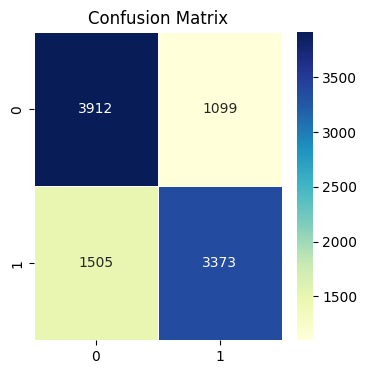

True Positive Cases: 3373
True Negative Cases: 3912
False Positive Cases: 1099
False Negative Cases: 1505


In [ ]:
# Define the Logistic Regression model
model = LGBMClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=-1, n_estimators=100, reg_alpha=1, reg_lambda=10, subsample=0.8, random_state=42)

# Fit the model to find the best parameters
model.fit(trainx, trainy)

# Make predictions on the training set
trainy_pred = model.predict(trainx)

# Evaluate the model on the training set
accuracy_train = accuracy_score(trainy, trainy_pred)
print("Training Accuracy:", accuracy_train)

# Make predictions on the test set
testy_pred = model.predict(testx)

# Evaluate the model on the test set
accuracy = accuracy_score(testy, testy_pred)
report = classification_report(testy, testy_pred, digits=5)
auc = roc_auc_score(testy, testy_pred)
f2 = fbeta_score(testy, testy_pred, beta=2)
precision_per_class = precision_score(testy, testy_pred, average=None)
f1 = fbeta_score(testy, testy_pred, beta=1)
average_precision = average_precision_score(testy, testy_pred)
weighted_recall = recall_score(testy, testy_pred, average='weighted')

# Additional Metrics
print("Accuracy:", accuracy)
print("AUC:", auc)
print("F1-score:", f1)
print("F2-score:", f2)
print("Precision per class:", precision_per_class)
print("Average Precision:", average_precision)
print("Weighted Average Recall:", weighted_recall)
print("Classification Report:\n", report)

# Confusion Matrix Visualization
plt.rcParams['figure.figsize'] = (4, 4)
sns.heatmap(confusion_matrix(testy, testy_pred), annot=True, fmt='d', linewidths=.5, cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.show()

# True Positive, True Negative, False Positive, False Negative
tp = confusion_matrix(testy, testy_pred)[1][1]
tn = confusion_matrix(testy, testy_pred)[0][0]
fp = confusion_matrix(testy, testy_pred)[0][1]
fn = confusion_matrix(testy, testy_pred)[1][0]

print('True Positive Cases: {}'.format(tp))
print('True Negative Cases: {}'.format(tn))
print('False Positive Cases: {}'.format(fp))
print('False Negative Cases: {}'.format(fn))

---
#### ◉ Ensemble (LGBM + RF + XGBoost)

[LightGBM] [Info] Number of positive: 27668, number of negative: 28369
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014461 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6630
[LightGBM] [Info] Number of data points in the train set: 56037, number of used features: 26
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.493745 -> initscore=-0.025020
[LightGBM] [Info] Start training from score -0.025020
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

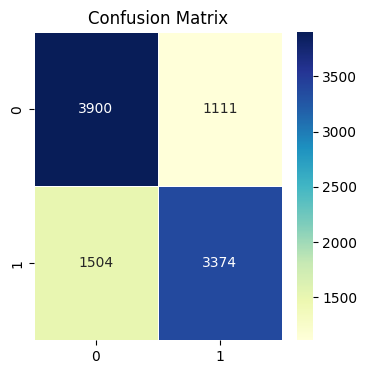

True Positive Cases: 3374
True Negative Cases: 3900
False Positive Cases: 1111
False Negative Cases: 1504
CPU times: user 3min 6s, sys: 427 ms, total: 3min 7s
Wall time: 3min 6s


In [ ]:
%%time
# Define individual models with parameters
lgbm_params = {
    'random_state': 42,
    'n_estimators': 200,
    'max_depth': 3,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 1.0,
    'reg_alpha': 10,
    'reg_lambda': 1
}
lgbm_model = LGBMClassifier(**lgbm_params)

rf_params = {
    'random_state': 42,
    'n_estimators': 350,
    'max_depth': 30,
    'min_samples_split': 5,
    'min_samples_leaf': 4
}
rf_model = RandomForestClassifier(**rf_params)

xgb_params = {
    'random_state': 42,
    'n_estimators': 200,
    'max_depth': 3,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 1.0,
    'reg_alpha': 10,
    'reg_lambda': 1
}
xgb_model = XGBClassifier(**xgb_params)

# Create a voting classifier
voting_model = VotingClassifier(
    estimators=[
        ('lgbm', lgbm_model),
        ('rf', rf_model),
        ('xgb', xgb_model)
    ],
    voting='soft'  # Use 'soft' for probability voting
)

# Fit the ensemble model to the training data
voting_model.fit(trainx, trainy)

# Make predictions on the training set
trainy_pred = voting_model.predict(trainx)

# Evaluate the model on the training set
accuracy_train = accuracy_score(trainy, trainy_pred)
print("Training Accuracy:", accuracy_train)

# Make predictions on the test set
testy_pred = voting_model.predict(testx)

# Evaluate the model on the test set
accuracy = accuracy_score(testy, testy_pred)
report = classification_report(testy, testy_pred, digits=5)
auc = roc_auc_score(testy, testy_pred)
f2 = fbeta_score(testy, testy_pred, beta=2)
precision_per_class = precision_score(testy, testy_pred, average=None)
f1 = fbeta_score(testy, testy_pred, beta=1)
average_precision = average_precision_score(testy, testy_pred)
weighted_recall = recall_score(testy, testy_pred, average='weighted')

# Additional Metrics
print("Accuracy:", accuracy)
print("AUC:", auc)
print("F1-score:", f1)
print("F2-score:", f2)
print("Precision per class:", precision_per_class)
print("Average Precision:", average_precision)
print("Weighted Average Recall:", weighted_recall)
print("Classification Report:\n", report)

# Confusion Matrix Visualization
plt.rcParams['figure.figsize'] = (4, 4)
sns.heatmap(confusion_matrix(testy, testy_pred), annot=True, fmt='d', linewidths=.5, cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.show()

# True Positive, True Negative, False Positive, False Negative
tp = confusion_matrix(testy, testy_pred)[1][1]
tn = confusion_matrix(testy, testy_pred)[0][0]
fp = confusion_matrix(testy, testy_pred)[0][1]
fn = confusion_matrix(testy, testy_pred)[1][0]

print('True Positive Cases: {}'.format(tp))
print('True Negative Cases: {}'.format(tn))
print('False Positive Cases: {}'.format(fp))
print('False Negative Cases: {}'.format(fn))

---
#### ◉ TabNet (Python)

In [ ]:
!pip install pytorch_tabnet

/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.10/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.70047 |  0:00:10s
epoch 1  | loss: 0.59023 |  0:00:23s
epoch 2  | loss: 0.58097 |  0:00:37s
epoch 3  | loss: 0.57167 |  0:00:45s
epoch 4  | loss: 0.56718 |  0:00:52s
epoch 5  | loss: 0.5634  |  0:00:55s
epoch 6  | loss: 0.56344 |  0:00:57s
epoch 7  | loss: 0.56266 |  0:01:00s
epoch 8  | loss: 0.5604  |  0:01:04s
epoch 9  | loss: 0.55921 |  0:01:07s
epoch 10 | loss: 0.55817 |  0:01:10s
epoch 11 | loss: 0.55981 |  0:01:13s
epoch 12 | loss: 0.55709 |  0:01:15s
epoch 13 | loss: 0.55552 |  0:01:19s
epoch 14 | loss: 0.55501 |  0:01:22s
epoch 15 | loss: 0.55298 |  0:01:25s
epoch 16 | loss: 0.55353 |  0:01:28s
epoch 17 | loss: 0.55124 |  0:01:30s
epoch 18 | loss: 0.55213 |  0:01:34s
epoch 19 | loss: 0.55081 |  0:01:38s
epoch 20 | loss: 0.55088 |  0:01:40s
epoch 21 | loss: 0.54944 |  0:01:43s
epoch 22 | loss: 0.54889 |  0:01:46s
epoch 23 | loss: 0.54832 |  0:01:50s
epoch 24 | loss: 0.54811 |  0:01:55s
epoch 25 | loss: 0.54712 |  0:01:59s
epoch 26 | loss: 0.54902 |  0:02:01s
e

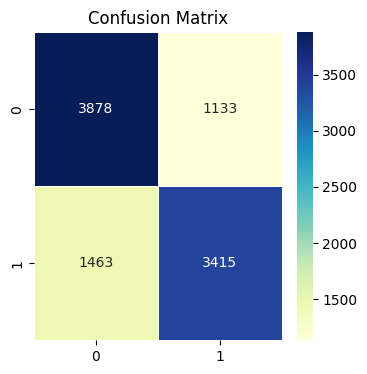

True Positive Cases: 3415
True Negative Cases: 3878
False Positive Cases: 1133
False Negative Cases: 1463


In [8]:
from pytorch_tabnet.tab_model import TabNetClassifier

# Define TabNet parameters
tabnet_params = {
    # TabNet parameters
}

# Create a TabNet model
tabnet_model = TabNetClassifier(**tabnet_params)

# Fit the TabNet model to the training data
tabnet_model.fit(trainx, trainy)

# Make predictions on the training set
trainy_pred = tabnet_model.predict(trainx)

# Evaluate the model on the training set
accuracy_train = accuracy_score(trainy, trainy_pred)
print("Training Accuracy:", accuracy_train)

# Make predictions on the test set
testy_pred = tabnet_model.predict(testx)

# Evaluate the model on the test set
accuracy = accuracy_score(testy, testy_pred)
report = classification_report(testy, testy_pred, digits=5)
auc = roc_auc_score(testy, testy_pred)
f2 = fbeta_score(testy, testy_pred, beta=2)
precision_per_class = precision_score(testy, testy_pred, average=None)
f1 = fbeta_score(testy, testy_pred, beta=1)
average_precision = average_precision_score(testy, testy_pred)
weighted_recall = recall_score(testy, testy_pred, average='weighted')

# Additional Metrics
print("Accuracy:", accuracy)
print("AUC:", auc)
print("F1-score:", f1)
print("F2-score:", f2)
print("Precision per class:", precision_per_class)
print("Average Precision:", average_precision)
print("Weighted Average Recall:", weighted_recall)
print("Classification Report:\n", report)

# Confusion Matrix Visualization
plt.rcParams['figure.figsize'] = (4, 4)
sns.heatmap(confusion_matrix(testy, testy_pred), annot=True, fmt='d', linewidths=.5, cmap="YlGnBu")
plt.title('Confusion Matrix')
plt.show()

# True Positive, True Negative, False Positive, False Negative
tp = confusion_matrix(testy, testy_pred)[1][1]
tn = confusion_matrix(testy, testy_pred)[0][0]
fp = confusion_matrix(testy, testy_pred)[0][1]
fn = confusion_matrix(testy, testy_pred)[1][0]

print('True Positive Cases: {}'.format(tp))
print('True Negative Cases: {}'.format(tn))
print('False Positive Cases: {}'.format(fp))
print('False Negative Cases: {}'.format(fn))


---
#### ◉ Optimized Neural Network (Python)

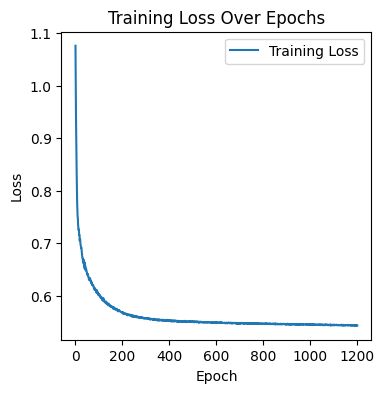

Training Accuracy: 0.734086407195246
Accuracy: 0.7383961977955303
AUC: 0.7384128022082456
F1-score: 0.73610119351219
F2-score: 0.7382248230142815
Precision per class: [0.74415794 0.73258883]
Average Precision: 0.670282945943867
Weighted Average Recall: 0.7383961977955303
Classification Report:
               precision    recall  f1-score   support

           0    0.74416   0.73718   0.74065      5011
           1    0.73259   0.73965   0.73610      4878

    accuracy                        0.73840      9889
   macro avg    0.73837   0.73841   0.73838      9889
weighted avg    0.73845   0.73840   0.73841      9889



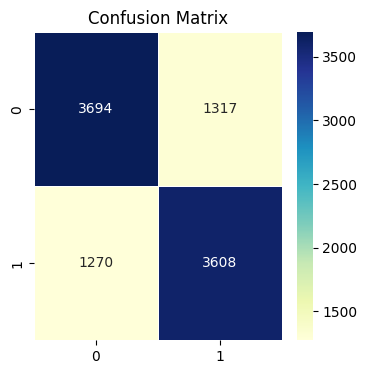

True Positive Cases: 3608
True Negative Cases: 3694
False Positive Cases: 1317
False Negative Cases: 1270
CPU times: user 5min 47s, sys: 18.2 s, total: 6min 5s
Wall time: 6min 8s


In [9]:
%%time
class ONN(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, dropout_rate=0.25):
        super(ONN, self).__init__()

        layers = []
        layers.append(nn.Linear(input_size, hidden_sizes[0]))
        layers.append(nn.PReLU())  # Using PReLU as an advanced activation function
        layers.append(nn.BatchNorm1d(hidden_sizes[0]))
        layers.append(nn.Dropout(p=dropout_rate))

        for i in range(len(hidden_sizes) - 1):
            layers.append(self._make_layer(hidden_sizes[i], hidden_sizes[i+1], dropout_rate))

        self.hidden_layers = nn.Sequential(*layers)
        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)
        self._initialize_weights()
        self.threshold = 0.45

    def _make_layer(self, in_features, out_features, dropout_rate):
        layer = nn.Sequential(
            nn.Linear(in_features, out_features),
            nn.PReLU(),
            nn.BatchNorm1d(out_features),
            nn.Dropout(p=dropout_rate)
        )
        return layer

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, nonlinearity='relu')  # He initialization
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)

    def set_threshold(self, threshold):
        self.threshold = threshold

    def forward(self, x):
        x = self.hidden_layers(x)
        x = self.output_layer(x)
        return x

    def predict(self, x):
        with torch.no_grad():
            self.eval()
            y_prob = F.softmax(self.forward(x), dim=1)  # Ensure to use self.forward
            y_pred = (y_prob[:, 1] > self.threshold).int().numpy()
        return y_pred

# Set the input, hidden, and output sizes
input_size = 26  # The number of features
hidden_sizes = [64, 128]
output_size = 2

# Create the neural network model
neural_net_model = ONN(input_size, hidden_sizes, output_size)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(neural_net_model.parameters(), lr=0.001)

# Convert data to PyTorch tensors if not already
trainx_tensor = torch.Tensor(trainx)
trainy_tensor = torch.LongTensor(trainy)  # Assuming classification with integers

# Training the neural network
num_epochs = 1200
train_losses = []

for epoch in range(num_epochs):
    # Forward pass
    outputs = neural_net_model(trainx_tensor)
    loss = criterion(outputs, trainy_tensor)
    train_losses.append(loss.item())

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Plot the training loss over epochs
plt.plot(range(1, num_epochs+1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

# Evaluation on the training set
with torch.no_grad():
    neural_net_model.eval()
    trainy_pred = neural_net_model.predict(trainx_tensor)
    accuracy_train = accuracy_score(trainy, trainy_pred)
    print("Training Accuracy:", accuracy_train)

# Evaluation on the test set
testx_tensor = torch.Tensor(testx)
testy_tensor = torch.LongTensor(testy)
with torch.no_grad():
    neural_net_model.eval()
    neural_net_model.set_threshold(0.45)  # Adjust the threshold
    testy_pred = neural_net_model.predict(testx_tensor)
    # Evaluate the model on the test set
    accuracy = accuracy_score(testy, testy_pred)
    report = classification_report(testy, testy_pred, digits=5)
    auc = roc_auc_score(testy, testy_pred)
    f2 = fbeta_score(testy, testy_pred, beta=2)
    precision_per_class = precision_score(testy, testy_pred, average=None)
    f1 = fbeta_score(testy, testy_pred, beta=1)
    average_precision = average_precision_score(testy, testy_pred)
    weighted_recall = recall_score(testy, testy_pred, average='weighted')

    # Additional Metrics
    print("Accuracy:", accuracy)
    print("AUC:", auc)
    print("F1-score:", f1)
    print("F2-score:", f2)
    print("Precision per class:", precision_per_class)
    print("Average Precision:", average_precision)
    print("Weighted Average Recall:", weighted_recall)
    print("Classification Report:\n", report)

    # Confusion Matrix Visualization
    plt.rcParams['figure.figsize'] = (4, 4)
    sns.heatmap(confusion_matrix(testy, testy_pred), annot=True, fmt='d', linewidths=.5, cmap="YlGnBu")
    plt.title('Confusion Matrix')
    plt.show()

    # True Positive, True Negative, False Positive, False Negative
    tp = confusion_matrix(testy, testy_pred)[1][1]
    tn = confusion_matrix(testy, testy_pred)[0][0]
    fp = confusion_matrix(testy, testy_pred)[0][1]
    fn = confusion_matrix(testy, testy_pred)[1][0]

    print('True Positive Cases: {}'.format(tp))
    print('True Negative Cases: {}'.format(tn))
    print('False Positive Cases: {}'.format(fp))
    print('False Negative Cases: {}'.format(fn))